In [64]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

%matplotlib inline

In [65]:
%reload_ext version_information
%version_information numpy, pandas, scipy

Software versions
Python 3.6.12 64bit [GCC 10.2.0]
IPython 7.16.1
OS Linux 5.8.0 7630 generic x86_64 with debian bullseye sid
numpy 1.19.4
pandas 1.1.5
scipy 1.5.4
Mon Dec 21 08:48:46 2020 CET

## Aufgabe 1.1 - Trainingspunkte generieren

In [66]:
SEED_DATA = False

if SEED_DATA:
    seed = [21, 42, 84, 168]
else:
    seed = [None, None, None, None]

In [67]:
X_train = pd.DataFrame(data={
    "x1": uniform.rvs(size=200, loc=-6, scale=12, random_state=seed[0]),
    "x2": uniform.rvs(size=200, loc=-6, scale=12, random_state=seed[1])
})

X_test = pd.DataFrame(data={
    "x1": uniform.rvs(size=200, loc=-6, scale=12, random_state=seed[2]),
    "x2": uniform.rvs(size=200, loc=-6, scale=12, random_state=seed[3])
})

## Aufgabe 1.2 - Labels erstellen

In [68]:
def quadrant(_x, _y):
    if x > 0 and y > 0:
        return 1    # 1. quadrant
    elif x < 0 and y > 0:
        return 0    # 2. quadrant
    elif x < 0 and y < 0:
        return 1    # 3. quadrant
    elif x > 0 and y < 0:
        return 0    # 4. quadrant
    else:
        raise ValueError("x & y == 0")

y_train = []
y_test = []

for x, y in zip(X_train['x1'], X_train['x2']):
    y_train.append(quadrant(x, y))

for x, y in zip(X_test['x1'], X_test['x2']):
    y_test.append(quadrant(x, y))

y_train = np.array(y_train)
y_test = np.array(y_test)

## Aufgabe 1.3 - Plotten
### Trainset plotten

Text(0.5, 1.0, 'Trainset')

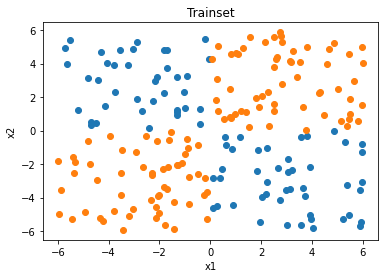

In [69]:
train_plot_matrix = X_train.copy()
train_plot_matrix['label'] = y_train

groups = train_plot_matrix.groupby('label')
for name, group in groups:
    plt.scatter(group.x1, group.x2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Trainset")

### Testset plotten

Text(0.5, 1.0, 'Testset')

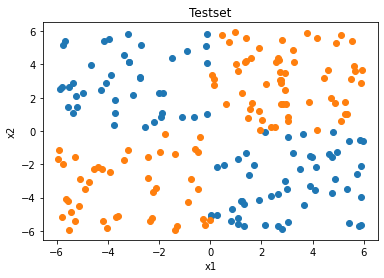

In [70]:
test_plot_matrix = X_test.copy()
test_plot_matrix['label'] = y_test

groups = test_plot_matrix.groupby('label')
for name, group in groups:
    plt.scatter(group.x1, group.x2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Testset")

## Aufgabe 1.4 - Gewichtsvektoren

Vertikale: $ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} + b = \hat{y} $

Horizontale: $ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} + b = \hat{y} $


## Aufgabe 1.5 -

In [71]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def decision_function(x, w, b):
    return sigmoid(w @ x + b)

def generate_gradient_mesh(x1, x2, w, b):
    _y = np.zeros(shape=(len(x1), len(x2), 2), dtype=float)

    for i in range(len(x1)):
        for j in range(len(x2)):
            _y[i][j] = decision_function(np.array([x1[i][j], x2[i][j]]), w, b)

    return _y


weights = np.array([[0, 1], [1, 0]])
biases = np.array([0, 0])

mesh_X1, mesh_X2 = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
mesh_y = generate_gradient_mesh(mesh_X1, mesh_X2, weights, biases)

Text(0, 0.5, 'x2')

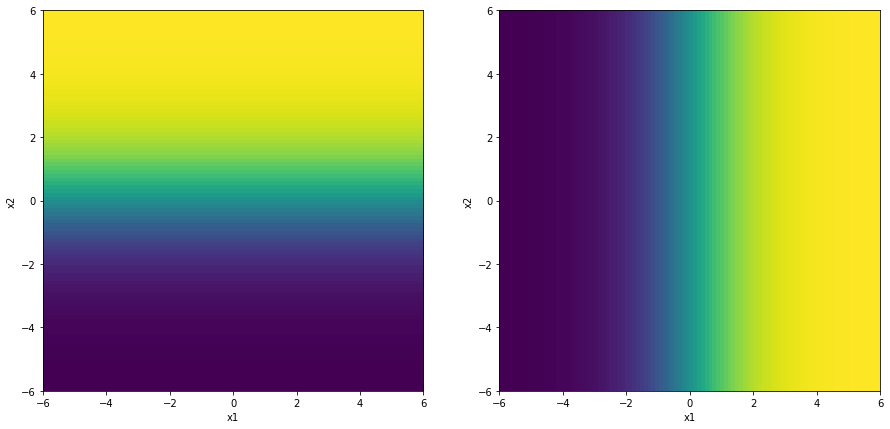

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))

background_plot = mesh_y[:,:,0].reshape(100, 100)
background_plot = np.flip(background_plot)
ax1.imshow(background_plot, extent = [-6, 6, -6, 6])

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

background_plot = mesh_y[:,:,1].reshape(100, 100)
ax2.imshow(background_plot, extent = [-6, 6, -6, 6])

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

## Aufgabe 1.6

In [73]:
weights = np.array([[0, 1], [1, 0]])
biases = np.array([0, 0])

X_train_design = np.zeros(shape=X_train.shape)

for i in range(len(X_train)):
    X_train_design[i] = decision_function(X_train.to_numpy()[i], weights, biases)

#TODO: 100 x 100 Gitter Designmatrix

In [74]:
weights = np.array([[0, 1], [1, 0]])
biases = np.array([0, 0])

X_test_design = np.zeros(shape=X_test.shape)

for i in range(len(X_test)):
    X_test_design[i] = decision_function(X_test.to_numpy()[i], weights, biases)

# Aufgabe 2

Setzen der Aktivierungsfunktion & Kostenfunktion

In [101]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Tanh
def tanh(z):
    return np.tanh(z)

# Ableitung des Tanh
def tanh_prime(z):
    return 2.0/(1.0*np.cosh(2.0*z))

# MSE-Kostenfunktion
def mse(_ypred, _y):
    return (_ypred - _y) ** 2

# Ableitung der MSE-Kostenfunktion
def mse_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

def log_cost(_ypred, _y):

    return np.nan_to_num(-_y * np.log(_ypred) - ((1 - _y) * np.log(1 - _ypred)))


def log_cost_derivative(output_activations, _y):
    first = - _y / output_activations
    second = (1-_y) / (1-output_activations)

    r = first + second

    # r = (output_activations - _y) / (output_activations - output_activations ** 2)

    return np.nan_to_num(r)

activation_func = sigmoid
activation_prime_func = sigmoid_prime

cost_func = mse
cost_derivative = mse_derivative

Funktionen aus dem Notebook aus der Vorlesung:

In [76]:
# Vorwärtslauf durch das Netzwerk für Testläufe (Prädiktion):
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = activation_func(np.dot(w, a)+b)
    return a

# Backpropagation-Algorithmus für ein Paar aus Input x und Label y:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]

    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = activation_func(z)
        activations.append(activation)

    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * activation_prime_func(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = activation_prime_func(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

# Gemitteltes Update über einen Minibatch:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]

    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()

        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)

        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]

    return (weights, biases)

# Stochastischer Gradientenabstieg:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):
    if activation_func == sigmoid:
        act_name = "sigmoid"
    elif activation_func == tanh:
        act_name = "tanh"
    else:
        raise ValueError("Unknown activation function")

    if cost_func == mse:
        cost_name = "mse"
    elif cost_func == log_cost:
        cost_name = "log"
    else:
        raise ValueError("Unknown cost function")

    print("Epochs: {} - mbs: {} - eta: {} - sizes: {} - activation_func: {} - cost_func: {}\n".format(
        epochs, mini_batch_size, eta, sizes, act_name, cost_name))

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten

    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mses = np.zeros(epochs)
    for j in range(epochs):

        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]

        # Zerlege den permutierten Datensatz in Minibatches
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)

        # Gib Performance aus
        acc_val[j], mses[j], accuracy = evaluate(x2, y2)
        if (j == epochs-1) or (j % 10 == 0):
            print("Epoch {}: {:3d}/{} - Loss: {:.3f} - Accuracy: {:.3f}".format(
                str(j).rjust(len(str(epochs))), int(acc_val[j]), n_test, mses[j], accuracy))

    return acc_val, mses

## Aufgabe 2.1

In [77]:
mbs = 10
eta = 0.03
epochs = 150

no_hidden = [2, 2]
sizes = [2] + no_hidden + [1]
num_layers = len(sizes)

## Aufgabe 2.2

In [78]:
def evaluate(x2, y2):
    correct = 0
    loss = 0
    n = x2.shape[0]

    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()

        # Vorwärtslauf
        ypred = feedforward(x)

        loss += cost_func(ypred[0][0], y)

        ctrue = y

        if activation_func == sigmoid:
            cpred = 1 if ypred[0][0] >= 0.5 else 0
        else:
            cpred = 1 if ypred[0][0] >= 0 else 0

        if ctrue == cpred:
            correct += 1

    loss = loss / x2.shape[0]

    return correct, loss, (correct/n)

## Aufgabe 2.3

In [79]:
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # Gewichte

result_acc_val, result_losses = SGD(x0=X_train_design, y0=y_train,
                                  epochs=epochs, mini_batch_size=mbs, eta=eta,
                                  x2=X_test_design, y2=y_test)

Epochs: 150 - mbs: 10 - eta: 0.03 - sizes: [2, 2, 2, 1] - activation_func: sigmoid - cost_func: mse

Epoch   0: 105/200 - Loss: 0.456 - Accuracy: 0.525
Epoch  10: 105/200 - Loss: 0.453 - Accuracy: 0.525
Epoch  20: 105/200 - Loss: 0.449 - Accuracy: 0.525
Epoch  30: 105/200 - Loss: 0.443 - Accuracy: 0.525
Epoch  40: 105/200 - Loss: 0.435 - Accuracy: 0.525
Epoch  50: 105/200 - Loss: 0.423 - Accuracy: 0.525
Epoch  60: 105/200 - Loss: 0.405 - Accuracy: 0.525
Epoch  70: 105/200 - Loss: 0.374 - Accuracy: 0.525
Epoch  80: 105/200 - Loss: 0.331 - Accuracy: 0.525
Epoch  90: 105/200 - Loss: 0.290 - Accuracy: 0.525
Epoch 100: 105/200 - Loss: 0.267 - Accuracy: 0.525
Epoch 110: 105/200 - Loss: 0.257 - Accuracy: 0.525
Epoch 120: 105/200 - Loss: 0.253 - Accuracy: 0.525
Epoch 130: 105/200 - Loss: 0.251 - Accuracy: 0.525
Epoch 140: 105/200 - Loss: 0.251 - Accuracy: 0.525
Epoch 149: 105/200 - Loss: 0.250 - Accuracy: 0.525


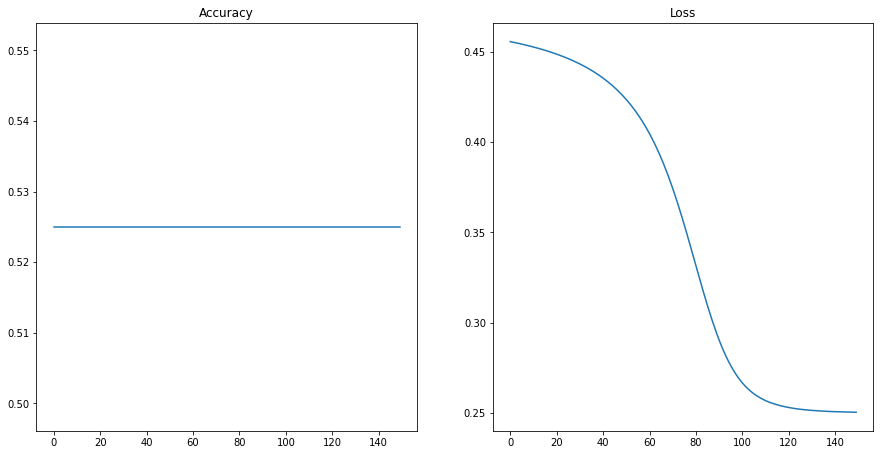

In [80]:
def plot_accuracy_and_losses(_acc_vals, _losses):
    _fig, (_ax1, _ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))

    _ax1.plot(_acc_vals)
    _ax2.plot(_losses)

    _ax1.set_title("Accuracy")
    _ax2.set_title('Loss')

plot_accuracy_and_losses(result_acc_val/X_test_design.shape[0], result_losses)

## Aufgabe 2.4

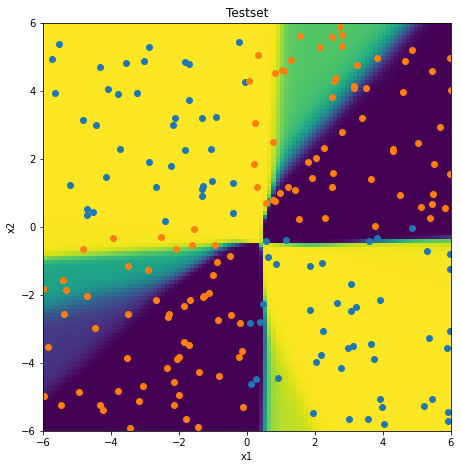

In [110]:
def plot_test_set_with_grid():
    _grid_x = np.array(np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))).T.reshape(100*100, 2)

    _results = np.zeros(_grid_x.shape[0])
    for j in range(_grid_x.shape[0]):
        _new_x = _grid_x[j].reshape(_grid_x[j].shape[0], 1)
        _results[j] = feedforward(_new_x)

    fig = plt.figure(figsize = (7.5, 7.5))

    _groups = train_plot_matrix.groupby('label')
    for _name, _group in _groups:
        plt.scatter(_group.x1, _group.x2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Testset")

    _background_plot = _results.reshape(100, 100)
    plt.imshow(_background_plot, extent = [-6, 6, -6, 6])

plot_test_set_with_grid()

## Aufgabe 3 - tanh als Aktivierungsfunktion

In [82]:
activation_func = tanh
activation_prime_func = tanh_prime

biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # Gewichte

result_acc_val, result_losses = SGD(x0=X_train_design, y0=y_train,
                                  epochs=epochs, mini_batch_size=mbs, eta=eta,
                                  x2=X_test_design, y2=y_test)

Epochs: 150 - mbs: 10 - eta: 0.03 - sizes: [2, 2, 2, 1] - activation_func: tanh - cost_func: mse

Epoch   0:  95/200 - Loss: 1.195 - Accuracy: 0.475
Epoch  10: 105/200 - Loss: 0.256 - Accuracy: 0.525
Epoch  20: 105/200 - Loss: 0.253 - Accuracy: 0.525
Epoch  30: 105/200 - Loss: 0.255 - Accuracy: 0.525
Epoch  40: 105/200 - Loss: 0.256 - Accuracy: 0.525
Epoch  50: 105/200 - Loss: 0.249 - Accuracy: 0.525
Epoch  60: 105/200 - Loss: 0.255 - Accuracy: 0.525
Epoch  70: 105/200 - Loss: 0.250 - Accuracy: 0.525
Epoch  80: 105/200 - Loss: 0.251 - Accuracy: 0.525
Epoch  90: 105/200 - Loss: 0.246 - Accuracy: 0.525
Epoch 100: 105/200 - Loss: 0.245 - Accuracy: 0.525
Epoch 110: 105/200 - Loss: 0.249 - Accuracy: 0.525
Epoch 120: 105/200 - Loss: 0.243 - Accuracy: 0.525
Epoch 130: 105/200 - Loss: 0.244 - Accuracy: 0.525
Epoch 140: 105/200 - Loss: 0.240 - Accuracy: 0.525
Epoch 149: 105/200 - Loss: 0.247 - Accuracy: 0.525


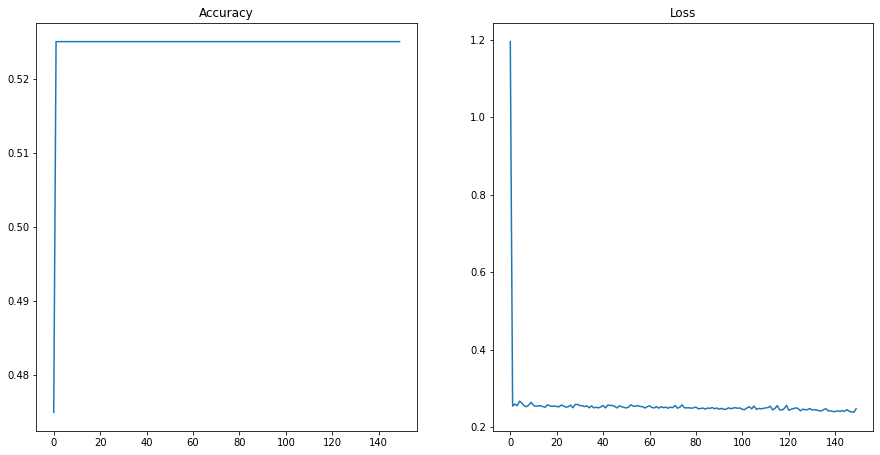

In [83]:
plot_accuracy_and_losses(result_acc_val/X_test_design.shape[0], result_losses)

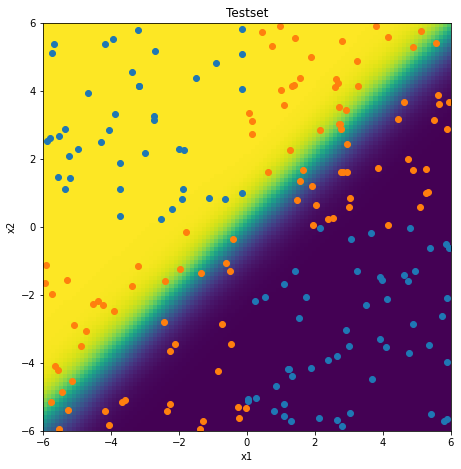

In [84]:
plot_test_set_with_grid()

## Aufgabe 4 - logistische Regression als Kostenfunktion

In [106]:
mbs = 10
eta = 1.0
epochs = 150

no_hidden = [10, 10, 10]
sizes = [2] + no_hidden + [1]
num_layers = len(sizes)

In [107]:
activation_func = sigmoid
activation_prime_func = sigmoid_prime

cost_func = log_cost
cost_derivative = log_cost_derivative

biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # Gewichte

result_acc_val, result_losses = SGD(x0=X_train_design, y0=y_train,
                                  epochs=epochs, mini_batch_size=mbs, eta=eta,
                                  x2=X_test_design, y2=y_test)

Epochs: 150 - mbs: 10 - eta: 1.0 - sizes: [2, 10, 10, 10, 1] - activation_func: sigmoid - cost_func: log

Epoch   0: 105/200 - Loss: 0.713 - Accuracy: 0.525
Epoch  10: 105/200 - Loss: 0.681 - Accuracy: 0.525
Epoch  20: 186/200 - Loss: 0.223 - Accuracy: 0.930
Epoch  30: 194/200 - Loss: 0.118 - Accuracy: 0.970
Epoch  40: 193/200 - Loss: 0.113 - Accuracy: 0.965
Epoch  50: 196/200 - Loss: 0.083 - Accuracy: 0.980
Epoch  60: 194/200 - Loss: 0.073 - Accuracy: 0.970
Epoch  70: 192/200 - Loss: 0.073 - Accuracy: 0.960
Epoch  80: 194/200 - Loss: 0.087 - Accuracy: 0.970
Epoch  90: 193/200 - Loss: 0.073 - Accuracy: 0.965
Epoch 100: 193/200 - Loss: 0.074 - Accuracy: 0.965
Epoch 110: 192/200 - Loss: 0.084 - Accuracy: 0.960
Epoch 120: 193/200 - Loss: 0.082 - Accuracy: 0.965
Epoch 130: 193/200 - Loss: 0.070 - Accuracy: 0.965
Epoch 140: 198/200 - Loss: 0.030 - Accuracy: 0.990
Epoch 149: 196/200 - Loss: 0.043 - Accuracy: 0.980


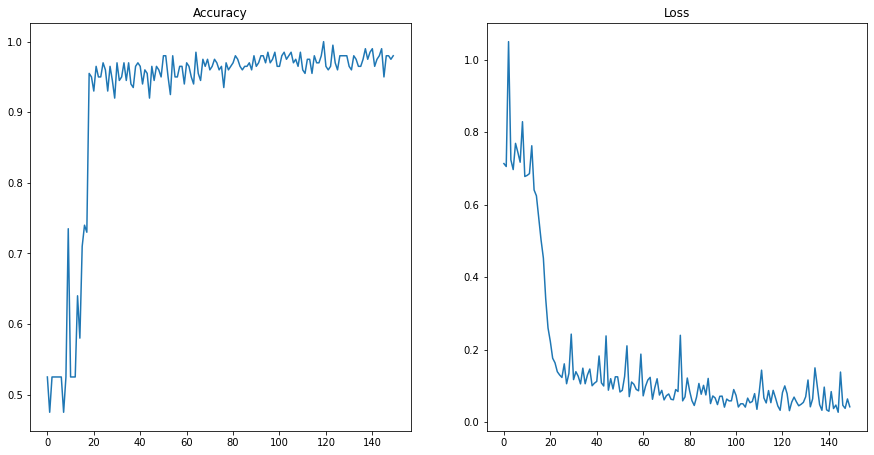

In [108]:
plot_accuracy_and_losses(result_acc_val/X_test_design.shape[0], result_losses)

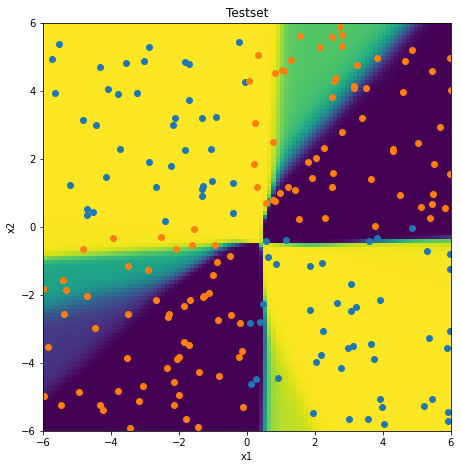

In [111]:
plot_test_set_with_grid()